In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('initial_v3.4_10yrs.db')
data = pd.read_sql('select slewtime from observations;', con)
con.close()

Text(0, 0.5, 'Cumulative Fraction of Slews')

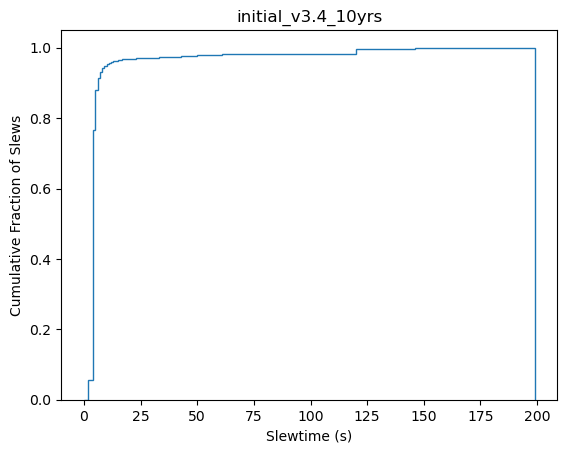

In [19]:
bins = np.arange(0,200)

plt.hist(data['slewTime'], bins=bins, cumulative=True, density=True, histtype="step")
plt.title('initial_v3.4_10yrs')
plt.xlabel('Slewtime (s)')
plt.ylabel('Cumulative Fraction of Slews')

(0.0, 20.0)

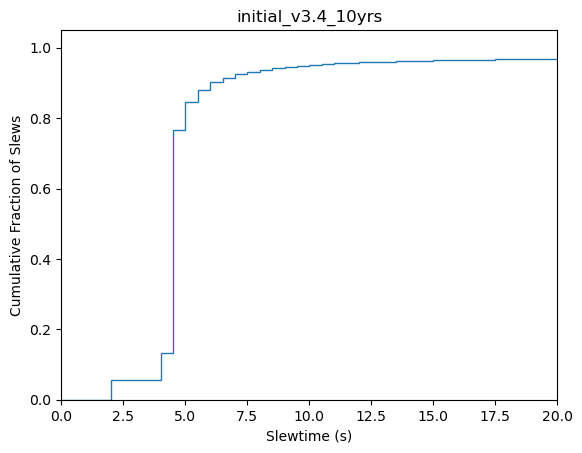

In [20]:
bins = np.arange(0,200, 0.5)

plt.hist(data['slewTime'], bins=bins, cumulative=True, density=True, histtype="step")
plt.title('initial_v3.4_10yrs')
plt.xlabel('Slewtime (s)')
plt.ylabel('Cumulative Fraction of Slews')
plt.xlim([0,20])